In [32]:
#%pip instell matplotlib
#%pip instell bs4

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

options = webdriver.ChromeOptions()
driver = webdriver.Chrome()
url = 'https://app1.reb.or.kr:4443/mobile_stat004.html'
driver.get(url)
time.sleep(5)
html_content = driver.page_source
div_element = driver.find_element(By.ID, 'stat_list1')
tbody = div_element.find_element(By.CSS_SELECTOR, 'tbody#listStat')

data = []
for row in tbody.find_elements(By.TAG_NAME, 'tr'):
    cols = row.find_elements(By.TAG_NAME, 'td')
    if len(cols) == 3:
        date = cols[0].text.strip()
        value1 = cols[1].text.strip()
        value2 = cols[2].text.strip()
        data.append([date, value1, value2])
driver.quit()


print("------------------------------------------------------")
# 페이지 내에 있는 데이터 출력하는 코드
print(["날짜", "주택매매전체", "아파트매매"])
print("------------------------------------------------------")
for item in data:
    print(item)
print("------------------------------------------------------")

# 문자열로 되어 있는 데이터를 숫자형으로 변경 하는 코드 (쉼표와 건을 제거 한 후, int형태로 변경)
def parse_value(value):
    return int(value.replace(',', '').replace('건', ''))

# int로 변경된 데이터 다시, 쉼표와 건을 포맷팅 하는 코드
def format_value(value):
    return f'{value:,}건'


print(["날짜", "주택매매전체", "아파트매매", "주택매매전체-아파트매매"])
print("------------------------------------------------")
for item in data:
    item_3 = parse_value(item[1])-parse_value(item[2]) # 주택매매전체 - 아파트매매
    item.append(format_value(item_3))
    print(item)
print("------------------------------------------------------")

## 판다스 데이터로 확인하시고 싶으시면.. 다음 코드를 활용하세요
print("------------------------------------------------------")
formatted_data = []
for item in data:
    date = item[0]
    value1 = parse_value(item[1])
    value2 = parse_value(item[2])
    difference = value1 - value2
    formatted_data.append([date, format_value(value1), format_value(value2), format_value(difference)])
print("------------------------------------------------------")

df = pd.DataFrame(formatted_data, columns=["날짜", "주택매매전체", "아파트매매", "주택매매전체-아파트매매"])
df.to_csv('housing_sales_data.csv', index=False)



------------------------------------------------------
['날짜', '주택매매전체', '아파트매매']
------------------------------------------------------
['2024.05', '57,436건', '43,278건']
['2024.04', '58,215건', '44,119건']
['2024.03', '52,816건', '40,233건']
['2024.02', '43,491건', '33,333건']
['2024.01', '43,033건', '32,111건']
['2023.12', '38,036건', '26,934건']
['2023.11', '45,415건', '32,821건']
['2023.10', '47,799건', '35,454건']
['2023.09', '49,448건', '37,629건']
['2023.08', '51,578건', '39,277건']
['2023.07', '48,170건', '36,260건']
['2023.06', '52,592건', '39,622건']
------------------------------------------------------
['날짜', '주택매매전체', '아파트매매', '주택매매전체-아파트매매']
------------------------------------------------
['2024.05', '57,436건', '43,278건', '14,158건']
['2024.04', '58,215건', '44,119건', '14,096건']
['2024.03', '52,816건', '40,233건', '12,583건']
['2024.02', '43,491건', '33,333건', '10,158건']
['2024.01', '43,033건', '32,111건', '10,922건']
['2023.12', '38,036건', '26,934건', '11,102건']
['2023.11', '45,415건', '32,821건', '12,59

<Figure size 1200x600 with 0 Axes>

C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Pytho

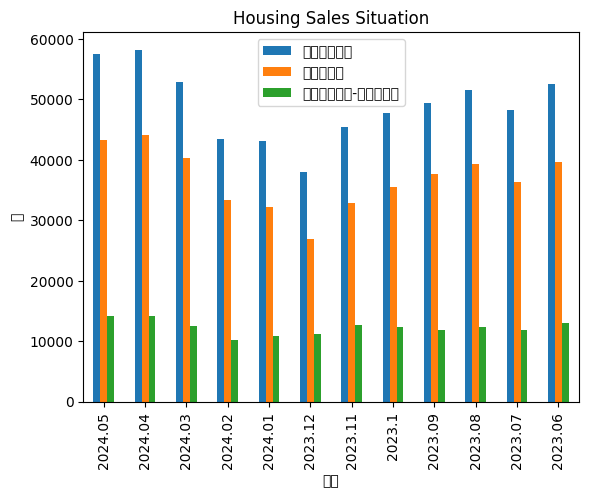

In [40]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('housing_sales_data.csv')

# 문자열 데이터를 숫자로 변환
df['주택매매전체'] = df['주택매매전체'].apply(parse_value)
df['아파트매매'] = df['아파트매매'].apply(parse_value)
df['주택매매전체-아파트매매'] = df['주택매매전체-아파트매매'].apply(parse_value)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
df.plot(kind='bar', x='날짜', y=['주택매매전체', '아파트매매', '주택매매전체-아파트매매'])
plt.title('Housing Sales Situation')
plt.xlabel('날짜')
plt.ylabel('건')
plt.legend()
plt.show()

------------------------------------------------------
['날짜', '주택매매전체', '아파트매매']
------------------------------------------------------
['2024.05', '57,436건', '43,278건']
['2024.04', '58,215건', '44,119건']
['2024.03', '52,816건', '40,233건']
['2024.02', '43,491건', '33,333건']
['2024.01', '43,033건', '32,111건']
['2023.12', '38,036건', '26,934건']
['2023.11', '45,415건', '32,821건']
['2023.10', '47,799건', '35,454건']
['2023.09', '49,448건', '37,629건']
['2023.08', '51,578건', '39,277건']
['2023.07', '48,170건', '36,260건']
['2023.06', '52,592건', '39,622건']
------------------------------------------------------
['날짜', '주택매매전체', '아파트매매', '주택매매전체-아파트매매']
------------------------------------------------
['2024.05', '57,436건', '43,278건', '14,158건']
['2024.04', '58,215건', '44,119건', '14,096건']
['2024.03', '52,816건', '40,233건', '12,583건']
['2024.02', '43,491건', '33,333건', '10,158건']
['2024.01', '43,033건', '32,111건', '10,922건']
['2023.12', '38,036건', '26,934건', '11,102건']
['2023.11', '45,415건', '32,821건', '12,59

<Figure size 1200x600 with 0 Axes>

C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Pytho

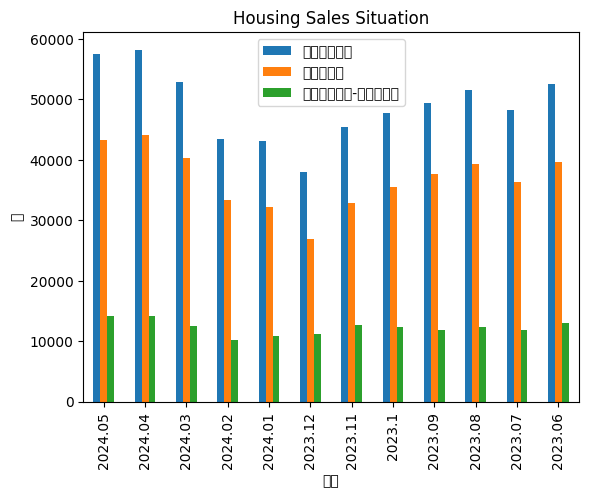

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
import time

options = webdriver.ChromeOptions()
driver = webdriver.Chrome()
url = 'https://app1.reb.or.kr:4443/mobile_stat004.html'
driver.get(url)
time.sleep(5)
html_content = driver.page_source
div_element = driver.find_element(By.ID, 'stat_list1')
tbody = div_element.find_element(By.CSS_SELECTOR, 'tbody#listStat')

data = []
for row in tbody.find_elements(By.TAG_NAME, 'tr'):
    cols = row.find_elements(By.TAG_NAME, 'td')
    if len(cols) == 3:
        date = cols[0].text.strip()
        value1 = cols[1].text.strip()
        value2 = cols[2].text.strip()
        data.append([date, value1, value2])
driver.quit()

print("------------------------------------------------------")
print(["날짜", "주택매매전체", "아파트매매"])
print("------------------------------------------------------")
for item in data:
    print(item)
print("------------------------------------------------------")

def parse_value(value):
    return int(value.replace(',', '').replace('건', ''))

def format_value(value):
    return f'{value:,}건'

print(["날짜", "주택매매전체", "아파트매매", "주택매매전체-아파트매매"])
print("------------------------------------------------")
for item in data:
    item_3 = parse_value(item[1]) - parse_value(item[2])
    item.append(format_value(item_3))
    print(item)
print("------------------------------------------------------")

formatted_data = []
for item in data:
    date = item[0]
    value1 = parse_value(item[1])
    value2 = parse_value(item[2])
    difference = value1 - value2
    formatted_data.append([date, format_value(value1), format_value(value2), format_value(difference)])

df = pd.DataFrame(formatted_data, columns=["날짜", "주택매매전체", "아파트매매", "주택매매전체-아파트매매"])
df.to_csv('housing_sales_data.csv', index=False)

# CSV 파일 읽기
df = pd.read_csv('housing_sales_data.csv')

# 문자열 데이터를 숫자로 변환
df['주택매매전체'] = df['주택매매전체'].apply(parse_value)
df['아파트매매'] = df['아파트매매'].apply(parse_value)
df['주택매매전체-아파트매매'] = df['주택매매전체-아파트매매'].apply(parse_value)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
df.plot(kind='bar', x='날짜', y=['주택매매전체', '아파트매매', '주택매매전체-아파트매매'])
plt.title('Housing Sales Situation')
plt.xlabel('날짜')
plt.ylabel('건')
plt.legend()
plt.show()

# 선 그래프
plt.figure(figsize=(12, 6))
df.plot(kind='line', x='날짜', y=['주택매매전체', '아파트매매', '주택매매전체-아파트매매'])
plt.title('Housing Sales Trend')
plt.xlabel('날짜')
plt.ylabel('건')
plt.legend()
plt.show()

# 산점도
plt.figure(figsize=(12, 6))
plt.scatter(df['주택매매전체'], df['아파트매매'])
plt.title('Housing Sales Scatter Plot')
plt.xlabel('주택매매전체')
plt.ylabel('아파트매매')
plt.show()

# 히스토그램
plt.figure(figsize=(12, 6))
df['주택매매전체'].hist(bins=20)
plt.title('Housing Sales Histogram')
plt.xlabel('주택매매전체')
plt.ylabel('Frequency')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Housing Sales Correlation Heatmap')
plt.show()
